**Imported all required library**

In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# loading the dataset to a pandas DataFrame
sky_dataset = pd.read_csv('skydata.csv')

**Exploratory data analysis**

In [ ]:
#Basic information

sky_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   dec        80000 non-null  float64
 1   u          80000 non-null  float64
 2   redshift   80000 non-null  float64
 3   z          80000 non-null  float64
 4   r          80000 non-null  float64
 5   ra         80000 non-null  float64
 6   run        80000 non-null  int64  
 7   specobjid  80000 non-null  uint64 
 8   field      80000 non-null  int64  
 9   plate      80000 non-null  int64  
 10  camcol     80000 non-null  int64  
 11  g          80000 non-null  float64
 12  objid      80000 non-null  int64  
 13  class      80000 non-null  object 
 14  fiberid    80000 non-null  int64  
 15  rerun      80000 non-null  int64  
 16  i          80000 non-null  float64
 17  mjd        80000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 11.0+ MB


In [ ]:
#Find the duplicates

sky_dataset.duplicated().sum()

0

In [ ]:
sky_dataset.shape

(80000, 18)

In [ ]:
# print the first 5 rows of the dataframe
sky_dataset.head()

dec         u  redshift         z         r          ra   run  \
0   2.803170  19.35065  0.142265  16.32664  17.04886  182.898466  1458   
1  23.891666  17.57148  0.000032  15.88743  16.04065  270.240850  4832   
2  14.323357  18.30611  0.073976  15.00599  15.73859  138.913885  5935   
3   6.157200  19.52862  0.040765  16.13952  16.88640  159.998722  2986   
4  -0.395033  18.91353  0.000084  17.14535  17.36865  181.624546  6793   

             specobjid  field  plate  camcol         g                objid  \
0   583309923396381000    388    518       4  17.89648  1237651736831980000   
1  2471445199432210000    126   2195       3  16.38217  1237666227497600000   
2  2742700762298610000    151   2436       4  16.52253  1237670965385040000   
3  1125959874568550000    276   1000       2  17.74360  1237658298460930000   
4   363748710133295000    140    323       3  17.80134  1237674649929380000   

    class  fiberid  rerun         i    mjd  
0    STAR      341    301  16.63305  52282  
1  GALAXY      345    301  15.92649  54234  
2    STAR       31    301  15.32356  54054  
3    STAR      218    301  16.48322  52643  
4  GALAXY      302    301  17.21479  51615

In [ ]:
sky_dataset.tail()

dec         u  redshift         z         r          ra   run  \
79995  58.093491  19.36814  0.102927  16.57812  17.29029  179.797354  2826   
79996   2.612478  18.71973  0.000426  17.33746  17.49476  151.950921  1462   
79997  29.385913  18.62474  0.057637  15.65200  16.30223  116.238594  2822   
79998  66.773361  18.04600  0.000060  15.79832  16.14084  117.910037  5060   
79999  18.620771  18.67949  0.000772  17.31960  17.42544  159.823621  5312   

                 specobjid  field  plate  camcol         g  \
79995  1477349224591940000    276   1312       5  18.03106   
79996  5334601264587360000    178   4738       5  17.78212   
79997  1000975639395720000     56    889       3  17.06923   
79998  3314804157889670000    167   2944       5  16.69588   
79999  6627192913079330000    183   5886       4  17.73353   

                     objid   class  fiberid  rerun         i    mjd  
79995  1237657612876780000    STAR      613    301  16.86924  52781  
79996  1237651754534960000  GALAXY      318    301  17.36612  55650  
79997  1237657594608750000    STAR      184    301  15.92962  52663  
79998  1237667207826570000  GALAXY      563    301  15.91642  54523  
79999  1237668289622510000  GALAXY      531    301  17.30182  56034

In [ ]:
sky_dataset.isnull().sum()

dec          0
u            0
redshift     0
z            0
r            0
ra           0
run          0
specobjid    0
field        0
plate        0
camcol       0
g            0
objid        0
class        0
fiberid      0
rerun        0
i            0
mjd          0
dtype: int64

In [ ]:
# statistical measures about the data
sky_dataset.describe()

dec             u      redshift             z             r  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean      24.956199     18.599217      0.044789     16.249336     16.688952   
std       20.684056      0.850213      0.053003      1.144420      1.013888   
min      -19.495456     10.611810     -0.004136      8.947795      9.005167   
25%        6.592120     18.151283     -0.000033     15.533245     16.112177   
50%       23.710118     18.836250      0.033506     16.264470     16.754960   
75%       40.306610     19.253073      0.078770     16.994713     17.392215   
max       84.490494     19.599950      1.945427     29.383740     31.990100   

                 ra           run     specobjid         field         plate  \
count  80000.000000  80000.000000  8.000000e+04  80000.000000  80000.000000   
mean     177.743131   3959.174013  2.752467e+18    187.312775   2444.599575   
std       77.896889   1673.864207  2.247970e+18    141.263033   1996.584854   
min        0.013061    109.000000  2.994897e+17     11.000000    266.000000   
25%      135.892460   2826.000000  1.334297e+18     85.000000   1185.000000   
50%      180.537028   3900.000000  2.319509e+18    153.000000   2060.000000   
75%      224.576979   5060.000000  3.221323e+18    249.000000   2861.000000   
max      359.973933   8162.000000  1.314852e+19    982.000000  11678.000000   

             camcol             g         objid       fiberid    rerun  \
count  80000.000000  80000.000000  8.000000e+04  80000.000000  80000.0   
mean       3.275537     17.255286  1.237662e+18    336.434625    301.0   
std        1.623022      0.906773  7.189191e+12    212.623680      0.0   
min        1.000000      9.988000  1.237646e+18      1.000000    301.0   
25%        2.000000     16.763295  1.237658e+18    158.000000    301.0   
50%        3.000000     17.414850  1.237662e+18    324.000000    301.0   
75%        5.000000     17.907175  1.237667e+18    496.000000    301.0   
max        6.000000     19.996050  1.237681e+18   1000.000000    301.0   

                  i           mjd  
count  80000.000000  80000.000000  
mean      16.417453  53832.966075  
std        1.074750   1441.947194  
min        8.848403  51608.000000  
25%       15.781940  52731.000000  
50%       16.453590  53712.000000  
75%       17.129413  54567.000000  
max       32.101780  58543.000000

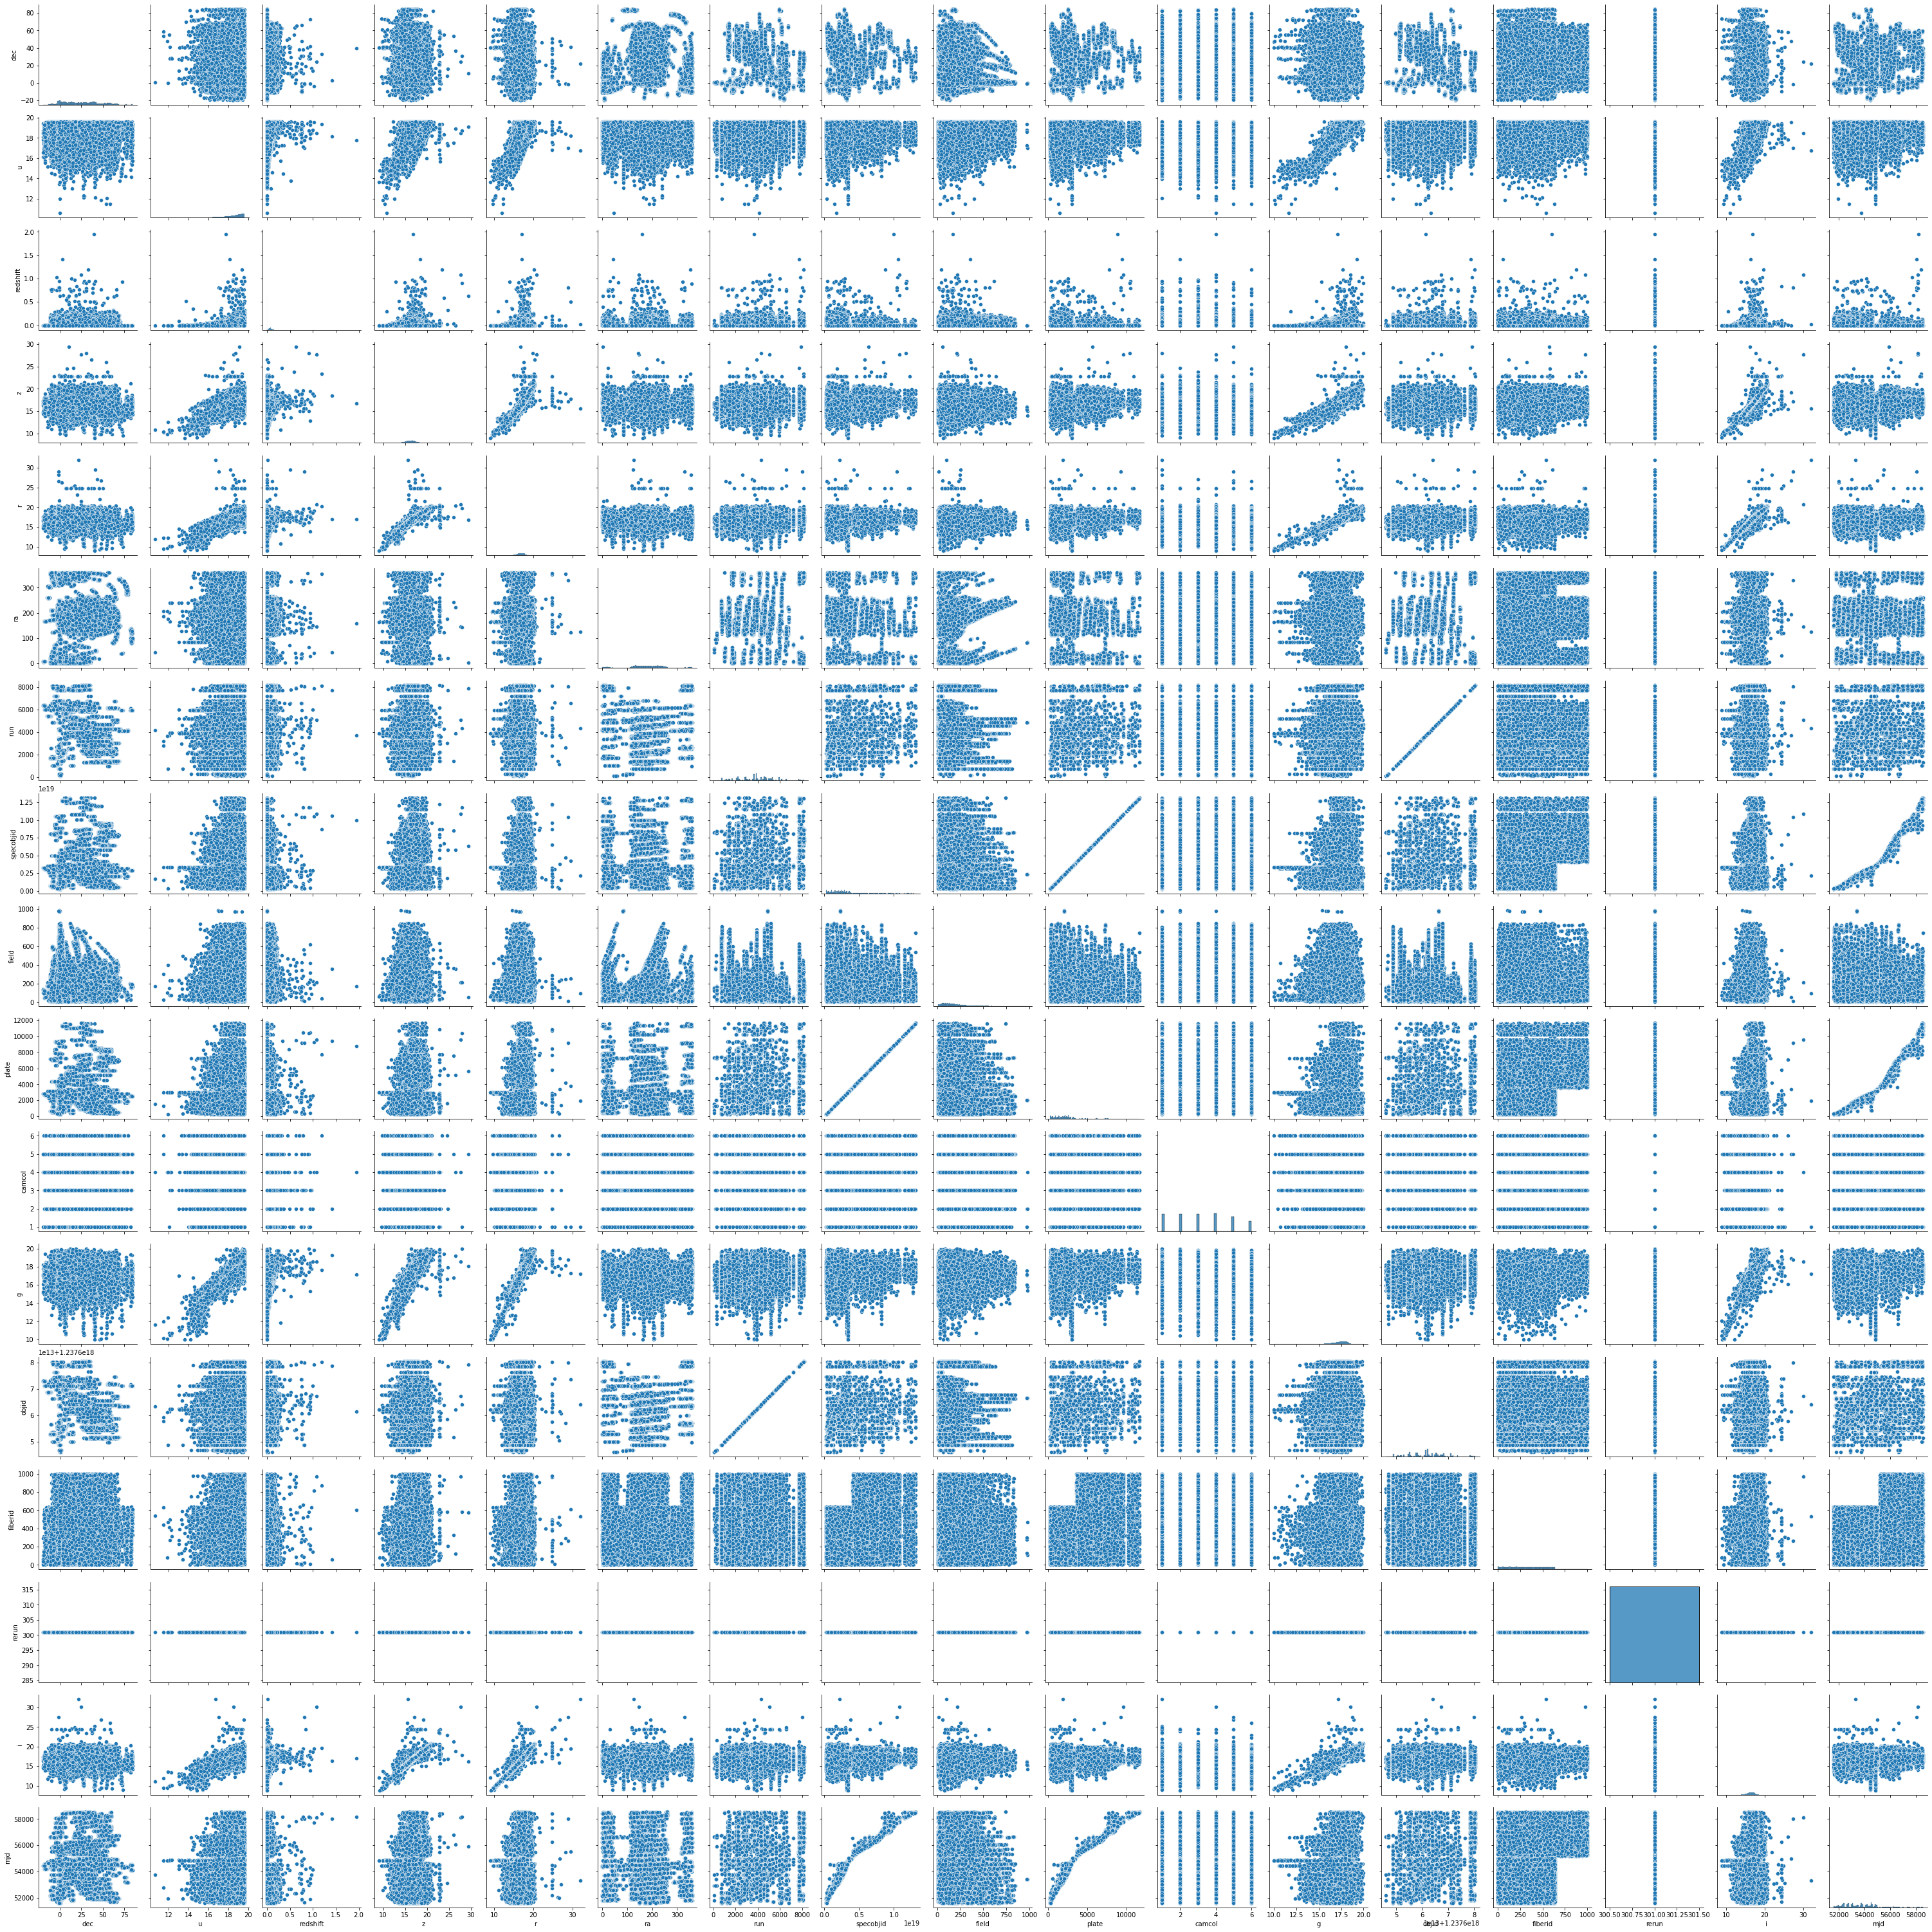

In [ ]:
#Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.
sns.pairplot(sky_dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbe3966690>,
      dtype=object)

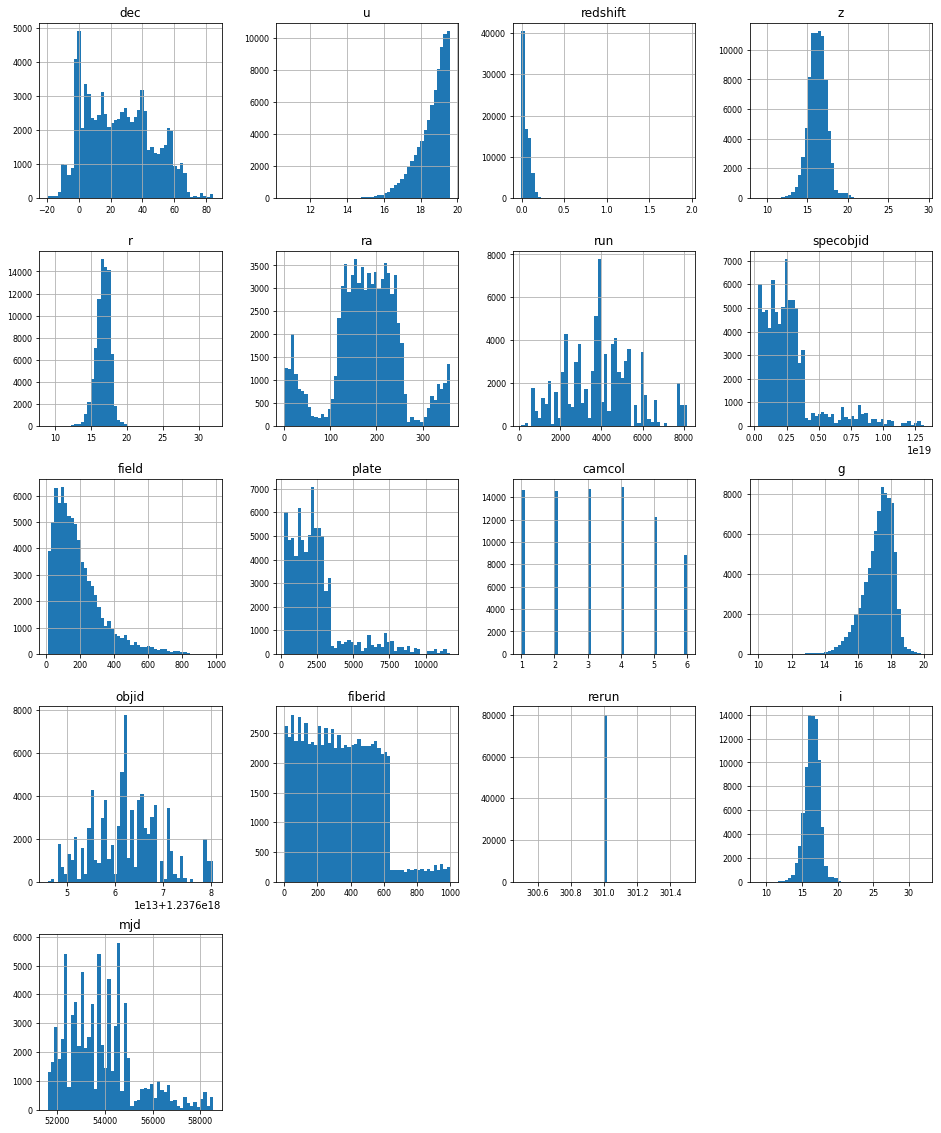

In [ ]:
# Plot histrogram for all column
sky_dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

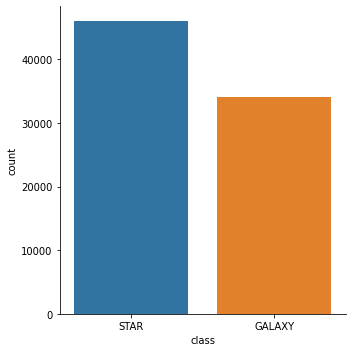

In [ ]:
# number of values for each class
sns.catplot(x='class', data = sky_dataset, kind = 'count')

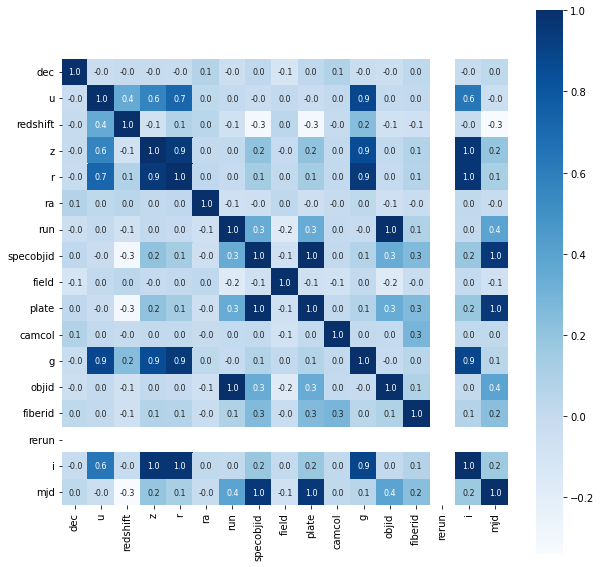

In [ ]:
# constructing a heatmap to understand the correlation between the columns
correlation = sky_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [ ]:
# label STAR as 0;  GALAXY as 1;
#Label Encoding
sky_dataset.loc[sky_dataset['class'] == 'STAR', 'class',] = 0
sky_dataset.loc[sky_dataset['class'] == 'GALAXY', 'class',] = 1

In [ ]:
# separating the data & label
X = sky_dataset.drop(columns = ['class'],axis=1)
Y = sky_dataset['class'].astype('int')

In [ ]:
Y

0        0
1        1
2        0
3        0
4        1
        ..
79995    0
79996    1
79997    0
79998    1
79999    1
Name: class, Length: 80000, dtype: int64

In [ ]:
#Splitting the data into training data & Testing data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

**Transformation of the data.**

In [ ]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_train.shape

(64000, 17)

**Train Model Using Random Forest Classifier**

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

**Test Model**

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy*100,'%')

Accuracy score of training data :  100.0 %


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy*100,'%')

Accuracy score of test data :  99.8625 %


In [ ]:
confusion_matrix(Y_test,X_test_prediction)

array([[9201,   14],
       [   8, 6777]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


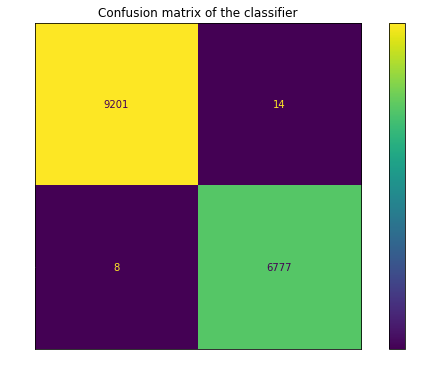

In [ ]:
matrix = plot_confusion_matrix(model, X_test, Y_test)
plt.title('Confusion matrix of the classifier')
plt.xlabel('predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
# Applying k-Fold Cross Validation

accuracies = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)


In [ ]:
accuracies

array([0.99859375, 0.9975    , 0.99765625, 0.9978125 , 0.99625   ,
       0.99828125, 0.99765625, 0.99734375, 0.99828125, 0.99625   ])

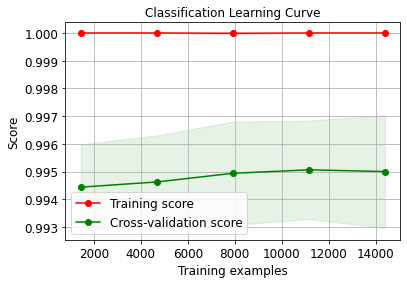

In [ ]:
skplt.estimators.plot_learning_curve(model, X_test, Y_test,
                                     cv=10, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

**Using Logistic regression**

In [ ]:
regressor = LogisticRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = regressor.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy*100,'%')

Accuracy score of training data :  99.2046875 %


In [ ]:
# accuracy on test data
X_test_prediction = regressor.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy*100,'%')

Accuracy score of test data :  99.2375 %


In [ ]:
confusion_matrix(Y_test,X_test_prediction)

array([[9094,  121],
       [   1, 6784]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


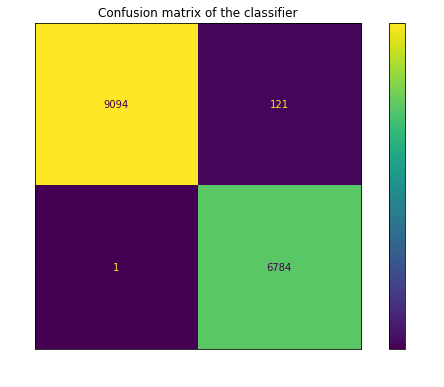

In [ ]:
matrix = plot_confusion_matrix(regressor, X_test, Y_test)
plt.title('Confusion matrix of the classifier')
plt.xlabel('predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
# Applying k-Fold Cross Validation

accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 10)

0.0009975556062195338

In [ ]:
accuracies

array([0.99328125, 0.991875  , 0.993125  , 0.99      , 0.99109375,
       0.9928125 , 0.99078125, 0.99234375, 0.991875  , 0.991875  ])

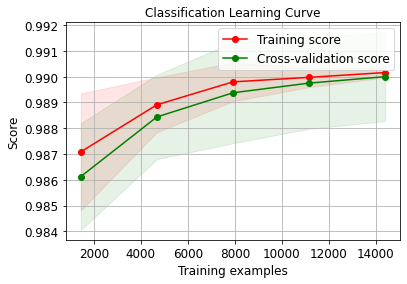

In [ ]:
skplt.estimators.plot_learning_curve(regressor, X_test, Y_test,
                                     cv=10, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

**Using Decision Tree Classifier**

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy*100,'%')

Accuracy score of training data :  100.0 %


In [ ]:
# accuracy on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy*100,'%')

Accuracy score of test data :  99.86874999999999 %


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


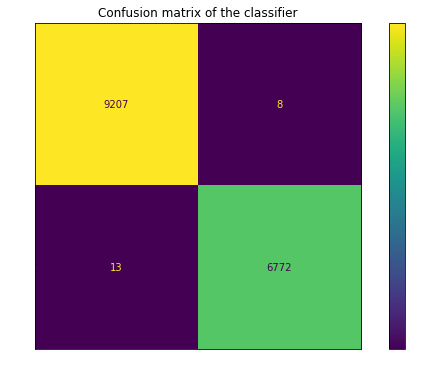

In [ ]:
matrix = plot_confusion_matrix(classifier, X_test, Y_test)
plt.title('Confusion matrix of the classifier')
plt.xlabel('predicted Label', color='white')
plt.ylabel('True Label', color='white')
plt.gcf().axes[0].tick_params(colors='white')
plt.gcf().axes[1].tick_params(colors='white')
plt.gcf().set_size_inches(10,6)
plt.show()

In [ ]:
# Applying k-Fold Cross Validation

accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)


0.0009275513799784908

In [ ]:
accuracies

array([0.999375  , 0.99859375, 0.99890625, 0.99859375, 0.99859375,
       0.99921875, 0.99671875, 0.99796875, 0.99890625, 0.9965625 ])

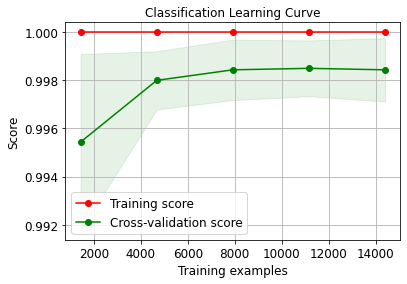

In [ ]:
skplt.estimators.plot_learning_curve(classifier, X_test, Y_test,
                                     cv=10, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

**In this task, I have used 3 different machine learning models. I got almost 99% accuracy from these 3 models. I also used the cross-validation technique. And finally, I showed the Classification Learning Curve. As it is a classification problem so i try to acheive good accuracy but surprisingly i got good accuracy score from them.**